# DATA 601 - HW06 (Spring 22)
Due date: May 12, 2022, 23:59 pm

In [115]:
# USUAL SUSPECTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Q1. (10 points)
Training and validation dataset: https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTraining.csv

* The last column of the HouseTraining.csv file lists price of 400 houses.
* There are 11 features
  * School rating (integer between 1 and 10)
  * House Area (sq ft)
  * Lot Area (sq ft)
  * Number of rooms
  * Number of bathrooms
  * Garage Yes:1, No: 0
  * Pool Yes:1, No: 0
  * Age of the House (years)
  * Walkability rating (something between 1 and 10)
  * Crime rate (something between 1 and 10)
  * Zipcode (Note that this is a fake data) 
  * House price ($)

Here are questions <br>
<b>1.1</b> Calculate the average crime rate for each zip code determine the zipcode with highest average crime rate? <br>
<b>1.2</b> Calculate the average house price for each zip code determine the zipcode with lowest average house price? Do you see a pattern? <br>
<b>1.3 </b> What feature has the strongest correlation with the "School_Rating" <br>
<b>1.4</b> Split your dataset into two (training 80\%, validation (testing) \%20, random_state=1). Build a multiple linear regression model to estimate the house price from all the other features we have and calculate the maximum relative error using $100*\mathrm{max}|(y_i-\hat{y}_i)/y_i|$ and $R^2$, where $y_i$ is the true value for the $i^{th}$ case in your testing data set and $\hat{y}_i$ is the prediction. <br>
<b>1.5</b> Download the new test dataset (https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTest.csv), guess the prices of these 10 houses featured in this dataset and print your predictions. Note that this dataset doesn't include "House_Price" column which was given in the training dataset.

In [116]:
#Q1 loading the data into a "HouseTraining" Dataframe.

HouseTraining = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTraining.csv")
HouseTraining.drop(HouseTraining.columns[[0]], axis = 1, inplace = True)
HouseTraining.head()

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
0,8,3672,7364,5.0,5.0,1.0,0.0,8,8.0,4,20104,15332000.0
1,6,1743,3893,2.0,2.0,0.0,0.0,33,5.0,8,20140,6411000.0
2,8,2242,5199,3.0,3.0,1.0,0.0,34,7.0,6,20182,8931000.0
3,8,2257,4699,3.0,3.0,0.0,1.0,42,6.0,5,20182,8662000.0
4,8,2436,5200,3.0,3.0,1.0,0.0,70,7.0,6,20182,9098000.0


In [117]:
#1.1 average crime rate for each zip code

crime_rate_zip = HouseTraining.groupby(['Zipcode'],as_index=False)['Crime_Rate'].mean()
crime_rate_zip=crime_rate_zip.sort_values('Crime_Rate',ascending=False,ignore_index=True)
print(crime_rate_zip)
print("\n","zipcode with highest average crime rate is", crime_rate_zip['Zipcode'][0])

   Zipcode  Crime_Rate
0    20140    6.511905
1    20174    6.368421
2    20119    4.610390
3    20182    4.500000
4    20104    4.283784

 zipcode with highest average crime rate is 20140


In [118]:
#1.2 average house price for each zip code

house_price_zip = HouseTraining.groupby(['Zipcode'],as_index=False)['House_Price'].mean()
house_price_zip= house_price_zip.sort_values('House_Price',ascending=False,ignore_index=True)
print(house_price_zip)
print("\n","zipcode with highest average house price is", house_price_zip['Zipcode'][0])

## we can see that the zip code with highest avg crime rate has lowest avg house price.

   Zipcode   House_Price
0    20182  1.090149e+07
1    20119  1.087213e+07
2    20104  1.083254e+07
3    20174  1.063704e+07
4    20140  1.030618e+07

 zipcode with highest average house price is 20182


School_Rating    1.000000
House_Area       0.003273
Lot_Area        -0.012608
Room_No          0.005996
Bath_No          0.011234
Garage           0.016915
Pool             0.001310
House_Age       -0.114875
Walkability      0.373675
Crime_Rate      -0.651958
Zipcode         -0.402891
House_Price      0.081382
Name: School_Rating, dtype: float64


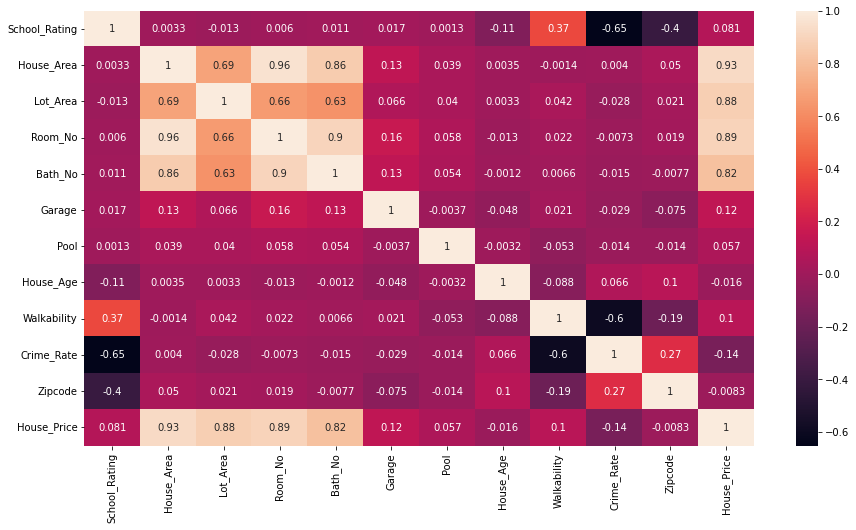

In [119]:
corrMatrix= HouseTraining.corr(method='pearson')
df= pd.DataFrame(corrMatrix)
print(df.loc[:,'School_Rating'])
plt.figure(figsize = (15,8))
sns.heatmap(corrMatrix, annot= True)
plt.show()

## it is evident from the heatmap that the features Walkability (positively correlated), Crime_Rate & Zipcode (negatively correlated) are strongly correlated to School_Rating.

In [120]:
#1.4 Building Multiple linear regression

HouseTraining.describe()

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
count,400.000000,400.000000,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,7.105000,2770.080000,5513.017500,3.940000,3.4500,0.507500,0.470000,37.680000,6.270000,5.347500,20144.722500,1.069526e+07
std,0.995718,706.472662,970.565547,1.057922,1.1427,0.548357,0.499724,21.441477,1.122609,1.504128,29.796309,2.363794e+06
min,6.000000,1516.000000,3252.000000,2.000000,1.0000,0.000000,0.000000,1.000000,4.000000,3.000000,20104.000000,5.449000e+06
25%,6.000000,2137.000000,4885.000000,3.000000,3.0000,0.000000,0.000000,18.000000,6.000000,4.000000,20119.000000,8.852000e+06
50%,8.000000,2782.500000,5514.500000,4.000000,3.0000,0.000000,0.000000,39.000000,6.000000,5.000000,20140.000000,1.067050e+07
75%,8.000000,3394.250000,6174.500000,5.000000,4.0000,1.000000,1.000000,56.250000,7.000000,6.000000,20174.000000,1.248075e+07
max,8.000000,3954.000000,7671.000000,6.000000,6.0000,2.000000,1.000000,72.000000,8.000000,8.000000,20182.000000,1.576600e+07


In [121]:
# splitting the data set into training and testing

X= HouseTraining.iloc[:, :-1]
y= HouseTraining.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 11)
(320,)
(80, 11)
(80,)


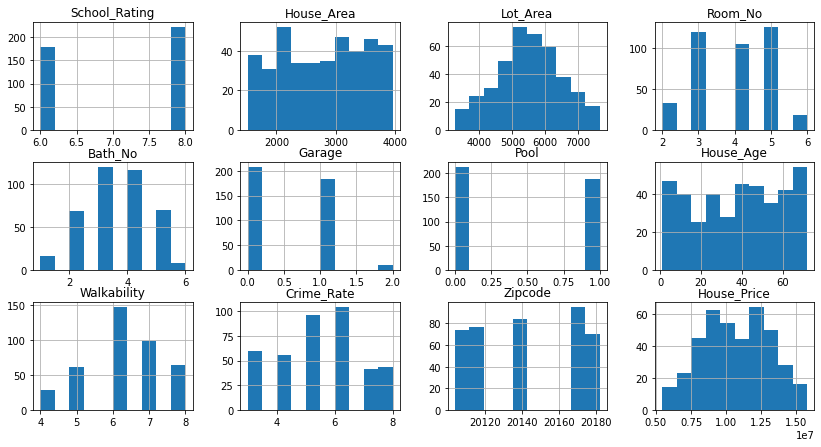

In [122]:
#Data Visualization

HouseTraining.hist(layout=(8,4),figsize=(14,20))
plt.show()

In [123]:
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_train_predict = lin_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))          #although it looks to be high value due to value range of house prices, when actually calculated rmse/(max house price-min house price) is 0.028 which is low.
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 303211.49909236486
R2 score is 0.9846839530376676




In [148]:
#feature selection

print("Feature data dimension: ", X.shape)

select = SelectKBest(score_func=f_regression, k=5)
z = select.fit_transform(X, y)
print("After selecting best k features:", z.shape)

Feature data dimension:  (400, 11)
After selecting best k features: (400, 5)


In [149]:
filter = select.get_support()
features = np.array(X.columns.tolist())
 
print("Selected best features:")
print(features[filter])



Selected best features:
['House_Area' 'Lot_Area' 'Room_No' 'Bath_No' 'Crime_Rate']


In [150]:
#Linear regression model using best features.

X_filtered = X.iloc[:,filter]
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state= 1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
yhat = linreg.predict(X_train)

# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, yhat)))
r2 = r2_score(y_train, yhat)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_hat = linreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_hat)))
r2 = r2_score(y_test, y_test_hat)

print("The model performance for testing set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:
RMSE is 306849.79649238294
R2 score is 0.9843141869971007


The model performance for testing set:
RMSE is 303762.84725508187
R2 score is 0.9759281880466723


In [128]:
#calculating the maximum relative error using  100∗max|(𝑦𝑖−𝑦̂𝑖)/𝑦𝑖| for test data.

y_test= list(y_test)
rel_list=[]
for i in range(len(y_test)):
   relative_err_max= 100* np.abs((y_test[i]-y_test_hat[i])/y_test[i])
   rel_list.append(relative_err_max)

print("maximum relative error for test data is:", max(rel_list))


maximum relative error for test data is: 5.776337533655608


In [129]:
#1.5 validating the model on test data set

HouseTest = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/HouseTest.csv")
HouseTest.drop(HouseTest.columns[[0]],axis=1, inplace= True)
HouseTest

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode
0,8,2030,4715,3.0,2.0,1.0,1.0,48,7.0,4,20166
1,8,1739,5499,2.0,2.0,0.0,1.0,37,8.0,3,20166
2,7,3628,5689,5.0,5.0,1.0,0.0,59,6.0,4,20170
3,4,2019,5441,3.0,2.0,0.0,0.0,2,4.0,8,20124
4,9,2311,6227,3.0,3.0,1.0,0.0,17,8.0,5,20165
5,8,3662,6049,5.0,4.0,1.0,0.0,41,5.0,6,20166
6,4,2545,5728,4.0,3.0,1.0,1.0,43,5.0,8,20124
7,9,3050,5876,4.0,4.0,0.0,1.0,2,6.0,5,20165
8,7,3079,6930,4.0,4.0,0.0,1.0,9,6.0,4,20189
9,7,1718,3883,2.0,1.0,0.0,0.0,10,8.0,5,20189


In [130]:
test_filtered = HouseTest.iloc[:,filter]

yhat_test= linreg.predict(test_filtered)

print(yhat_test)

[ 8583738.22681613  8996895.74555668 12931218.77143903  8506033.18288467
 10558856.43229138 12969729.28550456  9920136.38567409 11713420.58936005
 13112330.18672808  6803109.27719068]


## Q2. (10 points)

The Default data set of the ISLR2 package contains data about ten thousand customers. We know the balance of their bank account, their annual income and whether they are a student. You can download the dataset here: https://github.com/simsekergun/DATA601/blob/main/Datasets/Default.xlsx?raw=true'

Let's replace yes' and no's with 1's and 0's using the factorize() function. Note that factorize() returns two objects: a label array and an array with the unique values. We are only interested in the first object, i.e. <br>
<code>df = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/Datasets/Default.xlsx?raw=true',index_col=[0]) </code> <br>
<code>df['default'] = df.default.factorize()[0]</code>  <br>
<code>df['student'] = df.student.factorize()[0]</code> <br>


Here the steps/questions you need to follow <br>
<b>2.1</b> Plot the histograms of the features in this dataset. What kinds of distributions do you see? <br>
<b>2.2</b> Boxplot 'default vs balance' and 'default vs income'. Which one has outliers? <br> 
<b>2.3</b> Split your dataset into two (training 80\%, validation (testing) \%20, random_state=1). Build a simple logistic regression model to predict default from balance feature only. Create the confusion matric and calculate accuracy, sensitivity, and specificity. <br> 
<b>2.4</b> Repeat 2.3 but this time use 'balance', 'income', and 'student' features to predict the default with a multiple logistic regression model. Create the confusion matric and calculate accuracy, sensitivity, and specificity.  <br>
<b>2.5</b> What does having a high sensitivity and a low specificity mean?<br>

In [131]:
df = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/Datasets/Default.xlsx?raw=true') 
df.drop(df.columns[[0]], axis=1,inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [132]:
#Replacing No with 0 and yes with 1

df['default'] = df.default.factorize()[0] 
df['student'] = df.student.factorize()[0] 

In [133]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


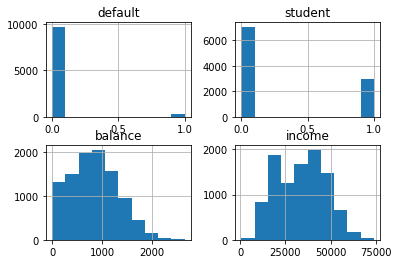

In [134]:
#2.1 Plotting the histograms for the features in this dataset

df.hist()
plt.show()

## we can see a normal distribution for balance and income features.

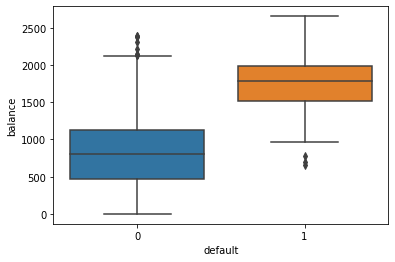

In [135]:
# 2.2 boxplot of default Vs balance

import seaborn as sns

sns.boxplot(x='default', y='balance', data= df)         #Outliers found in default Vs balance


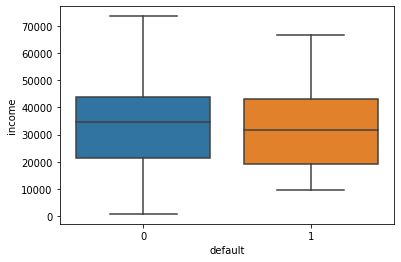

In [136]:
# boxplot of default Vs income

sns.boxplot(x='default', y='income', data= df)        #no outliers found in default Vs income

In [137]:
# 2.3 Building a logistic regression using only balance as input feature.

X1= df.loc[:,['balance']]
y1= df.loc[:,['default']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2, random_state= 1)

logreg = LogisticRegression()
logreg.fit(X_train1,y_train1)
logreg.score(X_test1,y_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9745

In [138]:
yhat1=logreg.predict(X_test1)

cm1=confusion_matrix(y_test1,yhat1,labels=[0,1])
print(cm1)

total1=sum(sum(cm1))

#from confusion matrix calculate accuracy

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[1930   11]
 [  40   19]]
Accuracy :  0.9745
Sensitivity :  0.994332818134982
Specificity :  0.3220338983050847


In [139]:
#2.4 Building a logistic regression using balance, income, students as features.

X2= df.loc[:,['balance','income','student']]
y2= df.loc[:,['default']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state= 1)

logreg = LogisticRegression()
logreg.fit(X_train2,y_train2)
logreg.score(X_test2,y_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.967

In [140]:
yhat2=logreg.predict(X_test2)

cm2=confusion_matrix(y_test2,yhat2,labels=[0,1])
print(cm2)

total2=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

[[1924   17]
 [  49   10]]
Accuracy :  0.967
Sensitivity :  0.9912416280267903
Specificity :  0.1694915254237288


In [141]:
# 2.5 

#having a high sensitivity and a low specificity means the prediction has a fairly high rate of false positives.